In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
from datetime import datetime

plt.rcParams['axes.grid'] = False 
plt.rcParams["figure.figsize"]=(14,4)

%matplotlib inline

In [2]:
def convert_to_date(df):
    df['Date'] = df['Date'].apply(lambda x : x.split('/')[2]+'-'+x.split('/')[0]+'-'+x.split('/')[1])
    df.sort_values('Date', inplace=True)
    if 'Close' not in list(df.columns):
        df.rename(columns={'Close/Last':'Close'},inplace=True)
    return df

In [3]:
def plot_stock(df,stock_name):
    plt.rcParams["figure.figsize"]=(20,10)
    plt.title(stock_name+' closing price')
    plt.plot(df['Date'], df['Close'])
    plt.show()

In [52]:
!pip install -U finance-datareader

In [53]:
import FinanceDataReader as fdr

In [54]:
df = fdr.StockListing('KRX')
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"이현우, 박대현",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7206,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7207,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7208,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7209,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [65]:
def find_symbol(name):
    df = fdr.StockListing('KRX')
    for i in range(len(df)):
        if df.loc[i]['Name'] == name:
            return df.loc[i]['Symbol']
        
def find_stock_data(symbol):
    return fdr.DataReader(symbol,'2019')

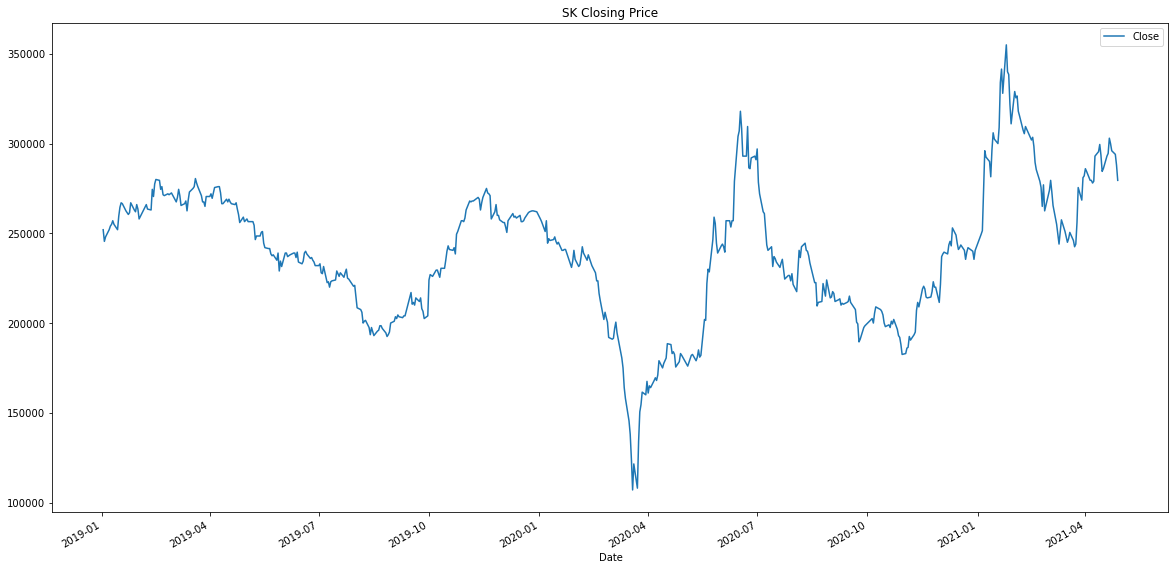

In [85]:
df = find_stock_data(find_symbol('SK'))
plt.title('SK Closing Price')
df['Close'].plot(label='Close')
plt.legend()

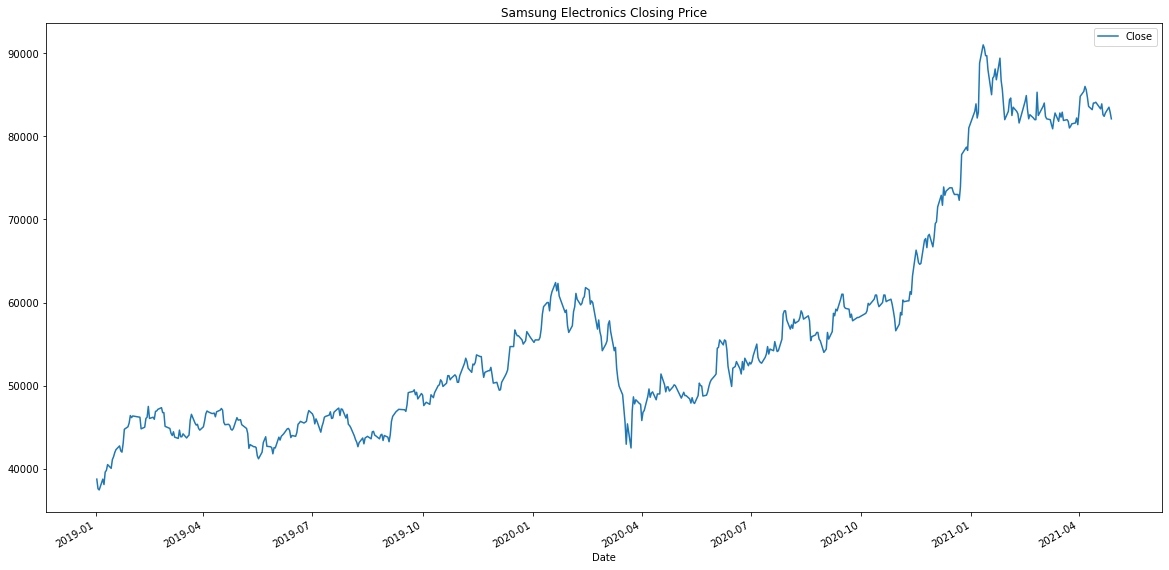

In [86]:
df = find_stock_data(find_symbol('삼성전자'))
plt.title('Samsung Electronics Closing Price')
df['Close'].plot(label='Close')
plt.legend()

In [88]:
!pip install twitterscraper

  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-py3-none-any.whl size=11352 sha256=89372522ecb3a815a7f9ef1e3c8fc990e3c81f46956927a66351552a153b52ad
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\da\4d\ce\0c0e093d6bff5b80e982788d854084121e90e74183a82c1aee
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1277 sha256=79aa56a98d529fcb053bdf247c658a0ea04fa228441dce2c19f015a738fde78a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built twitterscraper bs4


In [91]:
from twitterscraper import *

In [94]:
list_of_tweets = query_tweets("삼성전자", 10)

#print the retrieved tweets to the screen:
for tweet in query_tweets("Trump OR Clinton", 10):
    print(tweet)

In [95]:
list_of_tweets

[]

In [96]:
!pip install KoreaNewsCrawler

In [98]:
from korea_news_crawler.articlecrawler import ArticleCrawler

Crawler = ArticleCrawler()  
Crawler.set_category("정치", "IT과학", "economy")  
Crawler.set_date_range(2017, 1, 2018, 4)  
Crawler.start()

{'start_year': 2017, 'start_month': 1, 'end_year': 2018, 'end_month': 4}


In [99]:
import os

In [100]:
os.listdir()

['.ipynb_checkpoints',
 'copper.csv',
 'dataload (1).ipynb',
 'dataload.ipynb',
 'desktop.ini',
 'gx-understand-sector-impact-investment-management.pdf',
 'JOItmC-06-00099.pdf',
 's&p.csv',
 'Untitled.ipynb']

In [101]:
!tweeterscraper -h

'tweeterscraper' is not recognized as an internal or external command,
operable program or batch file.


In [102]:
df = pd.read_excel('NewsResult_20190102-20210428.xlsx')

In [103]:
df

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,2.100311e+06,20210428,서울경제,세종=양종곤 기자,"한국노총 조합원 140만 김동명 위원장 ""제1노총 복귀""",사회>노동_복지,사회>미디어,NaN,NaN,NaN,NaN,김동명,교사노동조합연맹,"용인시청노조,전국통합공무원노조,한국노총,삼성디스플레이,삼성전자,삼성전기,삼성,연청군...","140만,한국노총,조합원,김동명,복귀,위원장,노총,공공노총,조직,통합,민노총,조합원...","한국노총,조합원,공공노총,위원장,민주노총,김동명,2만,고용부,삼성,공무원,제1노총,...",국내 양대 노총 중 하나인 한국노총이 공공서비스노동조합총연맹과 조직을 통합하면서 민...,http://www.sedaily.com/NewsView/22L9EQKMPG,NaN
1,1.101001e+06,20210428,한겨레,NaN,4월 29일 궂긴 소식,경제>산업_기업,지역>광주,지역>강원,NaN,NaN,NaN,"박영임,이희숙,라성채,명채,이경범,정준구,경숙,하종신,김미선,강영민,영환,김영훈(오...","회계감사본부,광주","한국거래소,안진회계법인,분당서울대병원,덕원여고,원자력병원,중앙대병원,삼성전자,산학협...","소식,정준영,조선비즈,별세,박영임,자녀,소영,오빠,28일,12시,서울성모병원,발인,...","발인,팀장,김미선,영극,한국쓰리엠,강영민,분당서울대병원,구자용,협력단,하종신,산학협...","◆ 정준영(<조선비즈> 기자)씨 별세: 박영임씨 자녀, 소영씨 오빠=28일 오전 1...",http://www.hani.co.kr/arti/society/obituary/99...,NaN
2,2.100311e+06,20210428,서울경제,전희윤 기자,"SK하이닉스, 영업익 1.3조 ‘깜짝 실적’ ""8인치 파운드리 투자 확대""",경제>반도체,경제>유통,경제>산업_기업,NaN,NaN,NaN,"노종원,박정호",중국,"SK텔레콤,DB하이텍,SK하이닉스시스템IC,초미,신한금융투자,삼성전자,키파운드리,S...","SK하이닉스,영업익,실적,8인치,확대,파운드리,투자,PC,SK하이닉스,비수기,계절,...","반도체,파운드리,하이닉스,sk하이닉스,부사장,고용량,8인치,sk,영업이익,만큼,pc,중국",SK하이닉스가 지난 1분기 계절적 비수기임에도 반도체 시장의 호황에 힘입어 영업이익...,http://www.sedaily.com/NewsView/22L9EE87HZ,NaN
3,2.100851e+06,20210428,아주경제,강일용,"무선 이어폰 애플 천하 '흔들'... 삼성전자, 빠르게 추격",경제>유통,IT_과학>모바일,경제>자동차,NaN,NaN,NaN,이동근,"북미,아시아,중동,중국,중남미,아프리카","포인트리서치,애플,샤오미,JBL,경기,삼성전자,삼성","무선,이어폰,애플,천하,삼성전자,추격,카운터,포인트,리서치,세계,무선,이어폰,시장,...","카운터포인트리서치,삼성전자,이어폰,점유율,샤오미,2위,만큼,1위,지역별,이동근,북미...",삼성 갤럭시버즈 프로.[사진=연합뉴스 제공] \n \n 올해 글로벌 무선 이어폰 시...,http://www.ajunews.com/view/20210428180124526,NaN
4,1.100611e+06,20210428,서울신문,"한재희,오달란",‘이건희 주식’ 어떻게 나눌지 안 밝힌 삼성 “옥중이라 논의 못했나?”,경제>반도체,NaN,NaN,NaN,NaN,NaN,"이재용,이,이부진,이부진#부회장,이병철,이건희,홍라희",대주주,"삼성물산,삼성SDS,경제정의실천시민연합,호텔신라,삼성생명,삼성복지재단,국회,삼성전자...","이건희,주식,삼성,옥중,논의,19조,방식,이건희,주식,배분,안갯속,일가,삼성,오너,...","부회장,삼성,삼성전자,삼성생명,지배구조,삼성물산,이건희,가능성,호텔신라,상당액,상속...",‘삼성 오너 일가’는 28일 이건희 삼성전자 회장의 유산에 관한 내용을 발표하면서 ...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2.100501e+06,20210104,파이낸셜뉴스,파이낸셜뉴스,늘어나는 반도체 수출 ‘9만전자’ 가나,경제>반도체,경제>무역,경제>증권_증시,NaN,NaN,NaN,김경민,"한국,가나","삼성전자·SK하이닉스,삼성전자,화웨이,SK하이닉스,하나금융투자","반도체,수출,9만,전자,가나,증가세,반도체,수출,연속,삼성전자,SK하이닉스,주가,견...","반도체,8만,삼성전자,김경민,증가세,화웨이,하이닉스,sk하이닉스,한국,멀티칩,경신,...",반도체 수출 6개월 연속 증가세 \n삼성전자 SK하이닉스 주가 견인 \n\n \n\...,http://www.fnnews.com/news/202101031719162248,NaN
19996,1.200101e+06,20210104,경기일보,김태희 기자,"삼성전자, 국내 최고 수준 화력 '비스포크 인덕션' 출시",IT_과학>모바일,경제>유통,경제>자동차,NaN,NaN,NaN,이달래,"화력,월평","삼성전자,화력,삼성","삼성전자,최고,수준,화력,비스포크,인덕션,출시,삼성전자,차별화,디자인,수준,최고,화...","삼성전자,인덕션,비스포크,부스트,맥스,신제품,삼성,월평균,이달래,오염물,쇼트세란,6...",삼성전자가 차별화된 디자인과 국내 최고 수준의 화력을 갖춘 ‘삼성 비스포크(BESP...,www.kyeonggi.com/news/articleView.html?idxno=2...,NaN
19997,1.100701e+06,20210103,세계일보,박세준,"배터리 전자 2021년도 순항 정유, 코로나 따라 ‘널뛰기’",경제>유통,경제>증권_증시,경제>반도체,NaN,NaN,NaN,NaN,"고성,경기,순항","정부,현대오일뱅크,GS칼텍스,SK이노베이션,삼성전자,LG전자,LG에너지솔루션,SK하...","배터리,전자,순항,정유,코로나,널뛰기,감염증,신종,코로나바이러스,코로나19,글로벌,...","코로나19,전기차,영업이익,전자업계,성장세,sk이노베이션,칼텍스,삼성전자,반도체,언...",신종 코로나바이러스 감염증(코로나19)이 글로벌 경기에 큰 영향을 주면서 국내 산업...,http://www.segye.com/content/html/2021/01/03/2...,NaN
19998,1.500701e+06,20210103,부산일보,이정숙,"""이재용을 경영에 전념하게 자유의 몸으로"" 靑국민청원 등장",경제>경제일반,NaN,NaN,NaN,NaN,NaN,"이재용,이건희,이정숙","부산닷컴,서울,서초구","靑국민청원,서울고등법원,국민청원,청와대,민청원,연합뉴스,삼성전자,대한민국,삼성","이재용,경영,전념,자유,국민청원,등장,부회장,이재용,삼성전자,지난달,서울고등법원,서...","삼성,이재용,대한민국,청원인,청원,국민청원,자부심,게시판,청와대,부회장,기업인,부산...",이재용 삼성전자 부회장이 지난달 30일 오후 서울 서초구 서울고등법원에서 열리는 '...,http://www.busan.com/view/busan/view.php?code=...,NaN


In [104]:
len(df)

20000